# Map

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@6d87e0

Many `Op`s are written on single `RealType` inputs and outputs for simplicity. This can prove problematic, however, since `Ops` is used most often with images. Thus `map` was created to take such `Op`s and apply them to take pixel of an image. `map` is called as follows:

In [2]:
ij.op().help("map")

Available operations:
	(IterableInterval out) =
	net.imagej.ops.map.MapViewIIToII(
		IterableInterval in,
		UnaryComputerOp op,
		Type type)
	(IterableInterval out) =
	net.imagej.ops.map.MapUnaryComputers$IIToIIParallel(
		IterableInterval out,
		IterableInterval in,
		UnaryComputerOp op)
	(RandomAccessibleInterval out) =
	net.imagej.ops.map.MapUnaryComputers$IIToRAIParallel(
		RandomAccessibleInterval out,
		IterableInterval in,
		UnaryComputerOp op)
	(IterableInterval out) =
	net.imagej.ops.map.MapUnaryComputers$RAIToIIParallel(
		IterableInterval out,
		RandomAccessibleInterval in,
		UnaryComputerOp op)
	(IterableInterval out) =
	net.imagej.ops.map.MapUnaryComputers$IIToII(
		IterableInterval out,
		IterableInterval in,
		UnaryComputerOp op)
	(RandomAccessibleInterval out) =
	net.imagej.ops.map.MapUnaryComputers$IIToRAI(
		RandomAccessibleInterval out,
		IterableInterval in,
		UnaryComputerOp op)
	(IterableInterval out) =
	net.imagej.ops.map.MapUnaryComputers$RAIToII(
		IterableInte

As you can see there are a lot of options. Never fear, however, because they all follow a basic pattern of parameters:

* output / input: Depending on the `arity` (Nullary/Unary/Binary) and the kind (Computer/Function/Inplace) of `Op`s we are dealing with input(s) and output may be required. The output always comes before the input(s) in the signature.
* The `Op` instance: This is made before the call to `map`.

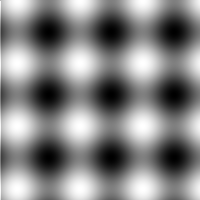

In [3]:
import net.imglib2.FinalInterval
import net.imglib2.type.numeric.integer.UnsignedByteType

//create two images using specified dimensions and type
exampleImgDims = new FinalInterval(200, 200)
input1 = ij.op().create().img(exampleImgDims, new UnsignedByteType())
input2 = ij.op().create().img(exampleImgDims, new UnsignedByteType())

//get the maximum possible value of an image data point
maxValue = input1.firstElement().getMaxValue()

//create a diagonal ramp on the first image
cursor1 = input1.cursor()
while(cursor1.hasNext()){
    intensityValue = (cursor1.getDoublePosition(0) + cursor1.getDoublePosition(1)) * maxValue / 400
    cursor1.next().set(intensityValue as int)
}

//create a blob pattern on the second
cursor2 = input2.cursor()
while(cursor2.hasNext()){
    intensityValue = 64 * (Math.sin(0.1 * cursor2.getDoublePosition(0)) + Math.cos(0.1 * cursor2.getDoublePosition(1))) + 128
    cursor2.next().set(intensityValue as int)
}

//TODO display both inputs side by side
ij.notebook().display(input2)

Now that we have our images we can create the `Op` instance that we will pass to `map`. Let's create a `UnaryComputerOp` that adds two `RealType`s. We can then pass this `UnaryComputerOp` to `map` to add the two images together:

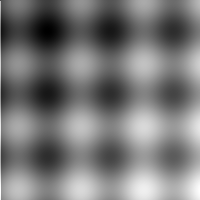

In [4]:
import net.imagej.ops.Ops
import net.imagej.ops.special.computer.Computers
import net.imglib2.type.numeric.integer.IntType


//create an output image with the same dimensions as the input, but with IntType (to prevent overflow)
output = ij.op().create().img(input1, new IntType())

//the Op needs to know the Type it is working on,
//so we will pass through the first element of the image as an example.
tempType = input1.firstElement()
tempOutputType = output.firstElement()

//parameters are (OpService, Class (Op Type), RealType (output), RealType (input 1), RealType(input 2))
addOp = Computers.binary(ij.op(), Ops.Math.Add.class, tempOutputType, tempType, tempType)

//call the Map Op
ij.op().run("map", output, input1, input2, addOp)

ij.notebook().display(output)